In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import sqlite3
import glob
from matplotlib import pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

/Users/hari/.pyenv/versions/3.6.5/envs/covid/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [105]:
def get_country(country):
    conn = sqlite3.connect("covid.db")
    df_all = pd.read_sql("select * from daily where Country like '{0}'".format(country),conn)
    conn.close()
    df_all=df_all.sort_values('Date')
    df_cntr=df_all[['Date','Confirmed','Deaths','Recovered']].fillna(0)
    df_cntr['Infected'] = df_cntr['Confirmed']-(df_cntr['Recovered']-df_cntr['Deaths'])
    return df_cntr

# Visualizing the Polymonial Regression results
def viz_polymonial(pol_reg,poly_reg,X,y):
    plt.figure(figsize=(25,10))
    sns.set(style="whitegrid")
    sns.set_context("poster")
    c=sns.lineplot(x=X.ravel(), y=y.ravel(),color="blue")
    sns.lineplot(x=X.ravel(), y=pol_reg.predict(poly_reg.fit_transform(X)).ravel(),color="red")
    c.set_xlabel("Count",fontsize=30)
    c.set_ylabel("Date",fontsize=30)
    for item in c.get_xticklabels():
        item.set_rotation(90)
        item.set_size(15)
    for item in c.get_yticklabels():
        item.set_size(15)
    return

def apply_poly_reg(country,column):
    df = get_country(country)
    df = df[df['Confirmed']>0]
    X=df['Date'].values
    y=df[column].values

    le = preprocessing.LabelEncoder()
    le.fit(X)
    X=le.transform(X).reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    poly_reg = PolynomialFeatures(degree=4)
    X_poly = poly_reg.fit_transform(X_train)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y_train)

    error = mean_squared_error(y, pol_reg.predict(poly_reg.fit_transform(X)), squared=False)
    viz_polymonial(pol_reg,poly_reg,X,y)
    print(error)
    print(pol_reg.predict(poly_reg.fit_transform(np.array([X[-2],X[-1],X[-1]+1,X[-1]+2]).reshape(-1, 1))))
    print(le.inverse_transform(np.array([X[-2],X[-1]]).ravel()))

317.4518496490965
[7245.14680883 7440.33982125 7620.00215105 7782.46102415]
['2020-04-09' '2020-04-10']


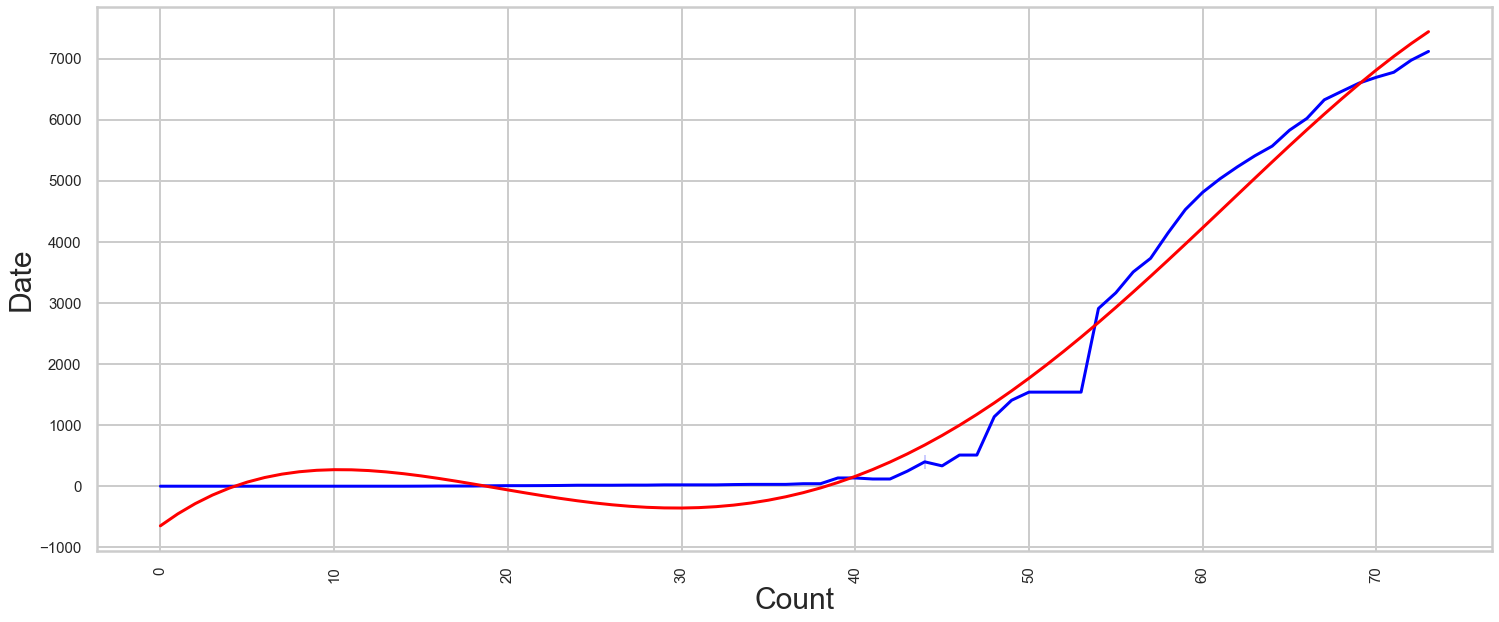

In [109]:
apply_poly_reg('South Korea','Recovered')